# Dataset

In [796]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split 

In [797]:
df_magic = pd.read_csv('magic04.data', header = None)
df_magic.columns = ['Lenght', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'Class']
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [798]:
le = LabelEncoder()
y = le.fit_transform(df_magic['Class'].values)
df_magic['Class'] = y

In [799]:
df_magic

,Lenght,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [800]:
X,y  = df_magic.iloc[:,:-1].values, df_magic.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 0, stratify= y, shuffle= True)
X_train = X_train[:500]
X_test = X_test[:500]
y_train = y_train[:500]
y_test = y_test[:500]


# Preprocessing


## Scaling


In [801]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Learning

## Logistic Regression

In [802]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np 
from sklearn.model_selection import cross_val_score


In [803]:
#Creo classificatore logistic regression
lr = LogisticRegression(random_state= 1)
#Creo una pipeline in cui viene fatto lo scaling e poi la stima con il classificatore
pipe_lr = make_pipeline(StandardScaler(), lr)
lr.fit(X_train_std, y_train)
#Prima stima dell'accuracy a crudo
#print('Accuracy sul test:', lr.score(X_test_std, y_test))
pipe_lr.fit(X_train, y_train)
print('Accuracy sul test della pipeline:', pipe_lr.score(X_test, y_test))


Accuracy sul test della pipeline: 0.788


In [804]:
#valuto lo score con la cross validation ossia lo score ottenuto sul validation dataset con quei valori degli iperparametri scelti.
scores = cross_val_score(estimator= pipe_lr, X = X_train, y = y_train, cv =10)
print('Score valutato con la k-fold validation:', np.mean(scores))

Score valutato con la k-fold validation: 0.788


In [805]:
#Adesso voglio trovare il valore migliore del parametro

param_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100,1000]
param_grid = [{'logisticregression__C': param_range, 'logisticregression__solver':['lbfgs']}, 
{'logisticregression__C': param_range, 'logisticregression__solver':['liblinear']}, 
{'logisticregression__C':param_range, 'logisticregression__solver':['newton-cholesky']} ]
gs = GridSearchCV(estimator= pipe_lr, param_grid= param_grid, scoring= 'accuracy', refit= True, cv = 10)

In [806]:
gs.fit(X_train, y_train)
print(gs.best_params_, gs.best_score_)

{'logisticregression__C': 0.001, 'logisticregression__solver': 'liblinear'} 0.8


In [807]:
pipe_lr = gs.best_estimator_
pipe_lr.fit(X_train, y_train)
scores = cross_val_score(estimator= pipe_lr, X = X_train, y = y_train, cv = 10)
print(np.mean(scores))

0.8


In [808]:
print('Accuracy del modello sul test data:', pipe_lr.score(X_test, y_test))

Accuracy del modello sul test data: 0.782


In [809]:
pipe_lr.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, random_state=1,
                                    solver='liblinear'))])>

## Logistic regression + feature selection

In [810]:
from sklearn.feature_selection import SequentialFeatureSelector

sbs = SequentialFeatureSelector(estimator = pipe_lr, scoring = 'accuracy' )
sbs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('logisticregression',
                                                     LogisticRegression(C=0.001,
                                                                        random_state=1,
                                                                        solver='liblinear'))]),
                          scoring='accuracy')

In [811]:
features = sbs.get_feature_names_out(df_magic.columns[:-1])
print(features)

['Lenght' 'Width' 'M3Long' 'Alpha' 'Dist']


In [812]:
X_train_sbs = sbs.transform(X_train)
X_test_sbs = sbs.transform(X_test)

In [813]:
print(pipe_lr)
pipe_lr.fit(X_train_sbs, y_train)
#print(pipe_lr.score(X_test_sbs, y_test))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, random_state=1,
                                    solver='liblinear'))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.001, random_state=1,
                                    solver='liblinear'))])

In [814]:

print(pipe_lr.score(X_test_sbs, y_test))

0.79


## Logistic regression + PCA

In [815]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train_std, y_train, test_size= 0.3, random_state= 0 , stratify= y_train)
pca.fit(X_train_2)



PCA()

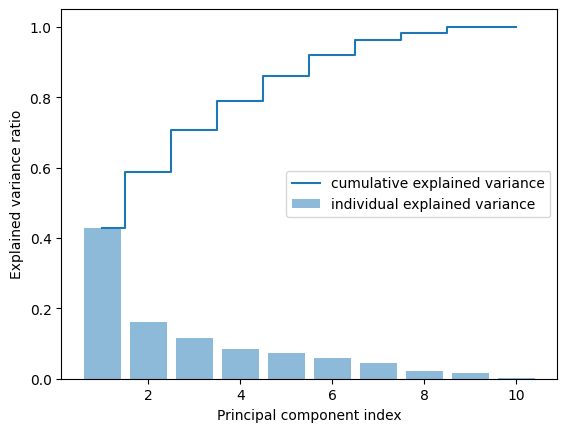

In [816]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

plt.bar(range(1,11), pca.explained_variance_ratio_, alpha  = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,11), cum_var_exp , where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

In [817]:

for i in [1,2,3,4,5,6,7,8,9]:
    pca = PCA(n_components= i)
    X_train_pca = pca.fit_transform(X_train_2)
    X_val_pca = pca.transform(X_val)
    pipe_lr.fit(X_train_pca, y_train_2)
    print(i, pipe_lr.score(X_val_pca, y_val))

1 0.6933333333333334
2 0.7466666666666667
3 0.7866666666666666
4 0.7733333333333333
5 0.7733333333333333
6 0.7933333333333333
7 0.7733333333333333
8 0.7733333333333333
9 0.7733333333333333


In [818]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components= 5), lr)


In [819]:
#param_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100,1000]
#param_range_2 = [1,2,3,4,5,6,7,8,9]
#param_grid = [{'logisticregression__C': param_range, 'pca__n_components': param_range_2}]
#gs = GridSearchCV(estimator= pipe_lr, param_grid=param_grid, cv = 10, refit = True, scoring = 'accuracy') 

In [820]:
#gs.fit(X_train, y_train)
#print(gs.best_params_, gs.best_score_)

In [821]:
#pipe_lr = gs.best_estimator_
pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test, y_test))
#print(np.mean(cross_val_score(estimator= pipe_lr, X = X_train, y = y_train, cv = 10)))

0.796


In [822]:
scores = cross_val_score(estimator= pipe_lr, X= X_train, y = y_train, cv = 10)
print(np.mean(scores))

0.788


## Random Forest

In [823]:
from sklearn.ensemble import RandomForestClassifier

In [824]:
forest = RandomForestClassifier(criterion='gini', random_state= 1, max_depth = 100)
forest.fit(X_train_std, y_train)
#print(forest.score(X_test_std, y_test))


RandomForestClassifier(max_depth=100, random_state=1)

In [825]:
pipe_rfc = make_pipeline(StandardScaler(), forest)


In [826]:
scores = cross_val_score(estimator= pipe_rfc, X = X_train, y = y_train, cv =10)
print('Score valutato con la k-fold validation:', np.mean(scores))

Score valutato con la k-fold validation: 0.834


In [827]:
param_range = [1,5,10,50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
param_grid = [{'randomforestclassifier__n_estimators': param_range, 'randomforestclassifier__criterion':['gini']}]
gs = GridSearchCV(estimator= pipe_rfc, param_grid= param_grid, scoring= 'accuracy', refit= True, cv = 10)

In [828]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(max_depth=100,
                                                               random_state=1))]),
             param_grid=[{'randomforestclassifier__criterion': ['gini'],
                          'randomforestclassifier__n_estimators': [1, 5, 10, 50,
                                                                   100, 200,
                                                                   300, 400,
                                                                   500, 600,
                                                                   700, 800,
                                                                   900,
                                                                   1000]}],
             scoring='accuracy')

In [829]:
print(gs.best_params_, gs.best_score_)

{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 400} 0.8520000000000001


In [857]:
pipe_rfc = gs.best_estimator_
pipe_rfc.fit(X_train, y_train)
scores = cross_val_score(estimator= pipe_rfc, X = X_train, y = y_train, cv = 10)
print(np.mean(scores))

0.8520000000000001


In [858]:
print('Accuracy del modello sul test data:', pipe_rfc.score(X_test, y_test))

Accuracy del modello sul test data: 0.84


## Random Forest + Feature selection

In [859]:
sbs = SequentialFeatureSelector(estimator = pipe_rfc, scoring = 'accuracy' )
sbs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('randomforestclassifier',
                                                     RandomForestClassifier(max_depth=100,
                                                                            n_estimators=400,
                                                                            random_state=1))]),
                          scoring='accuracy')

In [860]:
features = sbs.get_feature_names_out(df_magic.columns[:-1])
print(features)

['Lenght' 'Width' 'Size' 'Alpha' 'Dist']


In [861]:
X_train_sbs = sbs.transform(X_train)
X_test_sbs = sbs.transform(X_test)

In [862]:
#print(pipe_lr)
pipe_rfc.fit(X_train_sbs, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, n_estimators=400,
                                        random_state=1))])

In [863]:
print(pipe_rfc.score(X_test_sbs, y_test))

0.85


## Random forest + PCA


In [876]:
pca = PCA(n_components = None)
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train_std, y_train, test_size= 0.3, random_state= 0 , stratify= y_train)
pca.fit(X_train_2)

PCA()

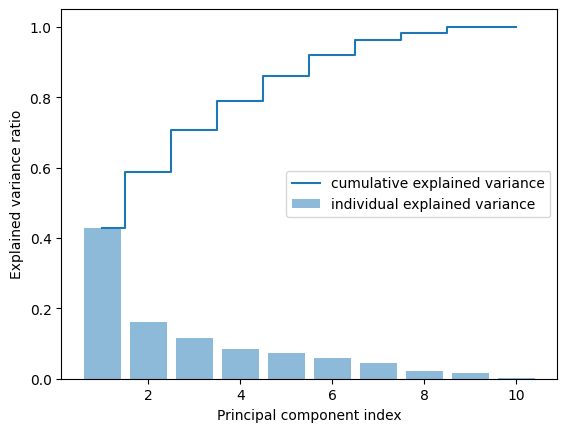

In [877]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

plt.bar(range(1,11), pca.explained_variance_ratio_, alpha  = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,11), cum_var_exp , where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

In [866]:
#pipe_rfc = make_pipeline(StandardScaler(), PCA(n_components=5), RandomForestClassifier(n_estimators= 400, criterion= 'gini', max_depth= 100, 
#random_state = 1)) 


In [878]:
for i in [1,2,3,4,5,6,7,8,9]:
    pca = PCA(n_components= i)
    X_train_pca = pca.fit_transform(X_train_2)
    X_val_pca = pca.transform(X_val)
    pipe_rfc.fit(X_train_pca, y_train_2)
    print(i, pipe_rfc.score(X_val_pca, y_val))

1 0.64
2 0.7666666666666667
3 0.7533333333333333
4 0.8066666666666666
5 0.82
6 0.8133333333333334
7 0.8066666666666666
8 0.8066666666666666
9 0.8066666666666666


In [879]:
pipe_rfc = make_pipeline(StandardScaler(), PCA(n_components=5), RandomForestClassifier(n_estimators= 400, criterion= 'gini', max_depth= 100, 
random_state = 1)) 
gs = GridSearchCV(estimator= pipe_rfc, param_grid= param_grid, scoring= 'accuracy', refit= True, cv = 10)


In [880]:
gs.fit(X_train, y_train)
print(gs.best_score_, gs.best_params_)

0.796 {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 1000}


In [881]:
pipe_rfc = gs.best_estimator_
pipe_rfc.fit(X_train, y_train)
print(pipe_rfc.score(X_test, y_test))

0.824


In [882]:
pipe_rfc.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, n_estimators=1000,
                                        random_state=1))])>